In [62]:
# Import libraries
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

import missingno as msno
from textwrap import wrap

In [63]:
# Load dataset
transaction_df = pd.read_excel('/Users/meiliu/Desktop/Data/Python project/bikes & cycling Cohort Analysis/transactions.xlsx')

# View data
transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,42791,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,42876,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,43024,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,42978,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,43009,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


<Axes: >

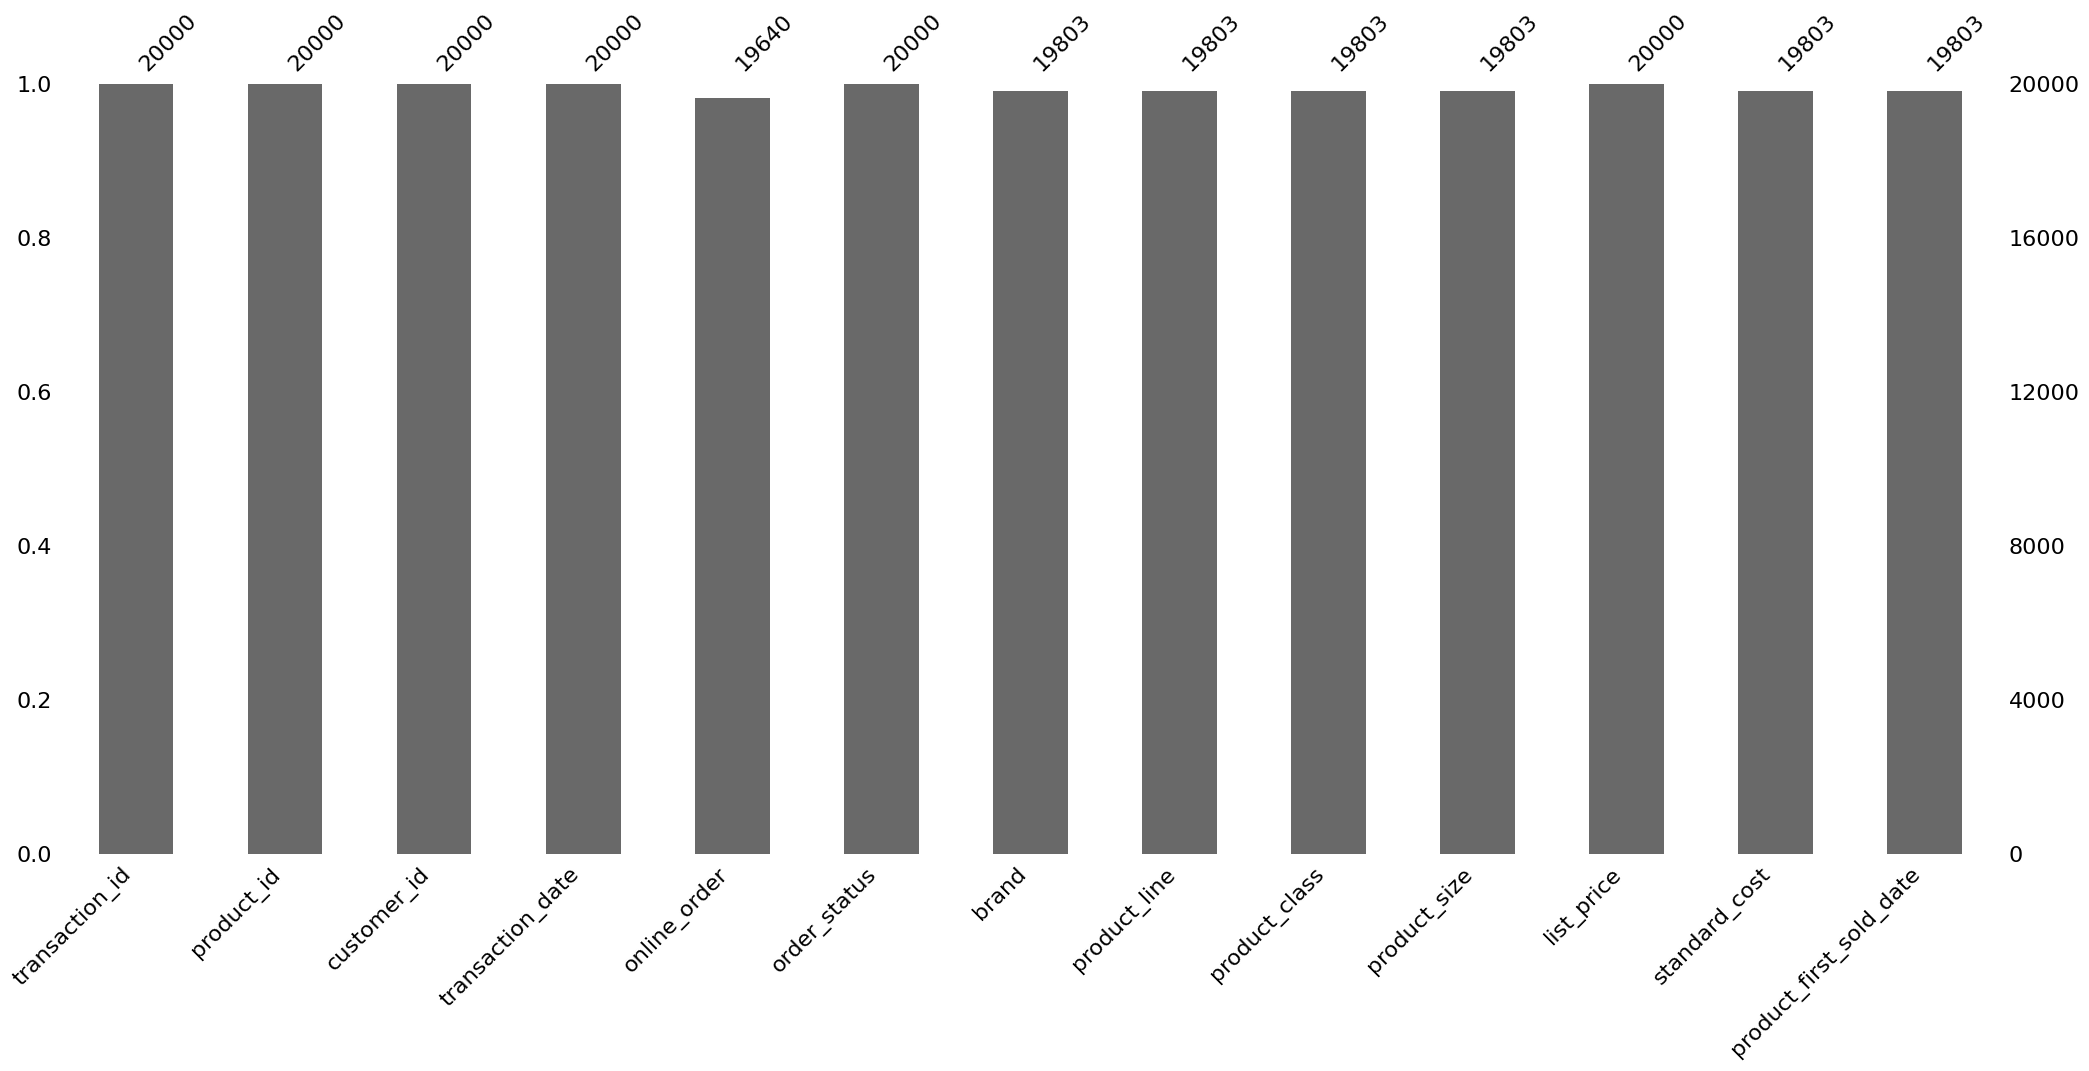

In [64]:
# Visualize missing values using Missingno's bar chart
msno.bar(transaction_df)

In [65]:
# Inspect missing values in the dataset
print(transaction_df.isnull().values.sum())

# Identify numeric columns
numeric_columns = transaction_df.select_dtypes(include=[np.number])

# Fill missing values in numeric columns with their respective means
transaction_df[numeric_columns.columns] = transaction_df[numeric_columns.columns].fillna(numeric_columns.mean())

# Count the number of NaNs in the dataset to verify
print(transaction_df.isnull().values.sum())

1542
788


In [66]:
# Display DataFrame information, including missing values
print(transaction_df.info())

# Loop through each column in the DataFrame
for col in transaction_df.columns:
    # Check if the column is of object type
    if transaction_df[col].dtypes == 'object':
        # Impute with the most frequent value
        transaction_df[col] = transaction_df[col].fillna(transaction_df[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print(transaction_df.isnull().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  int64  
 4   online_order             20000 non-null  float64
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            20000 non-null  float64
 12  product_first_sold_date  20000 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 2.0+ MB
None
0


In [67]:
# Convert transaction_date datatype to datetime 
transaction_df['transaction_date'] = pd.to_datetime(transaction_df['transaction_date'], unit='D', origin='1899-12-30')

# Display the updated DataFrame
print(transaction_df.head())

   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  
0       71.49          53.62        

<Axes: >

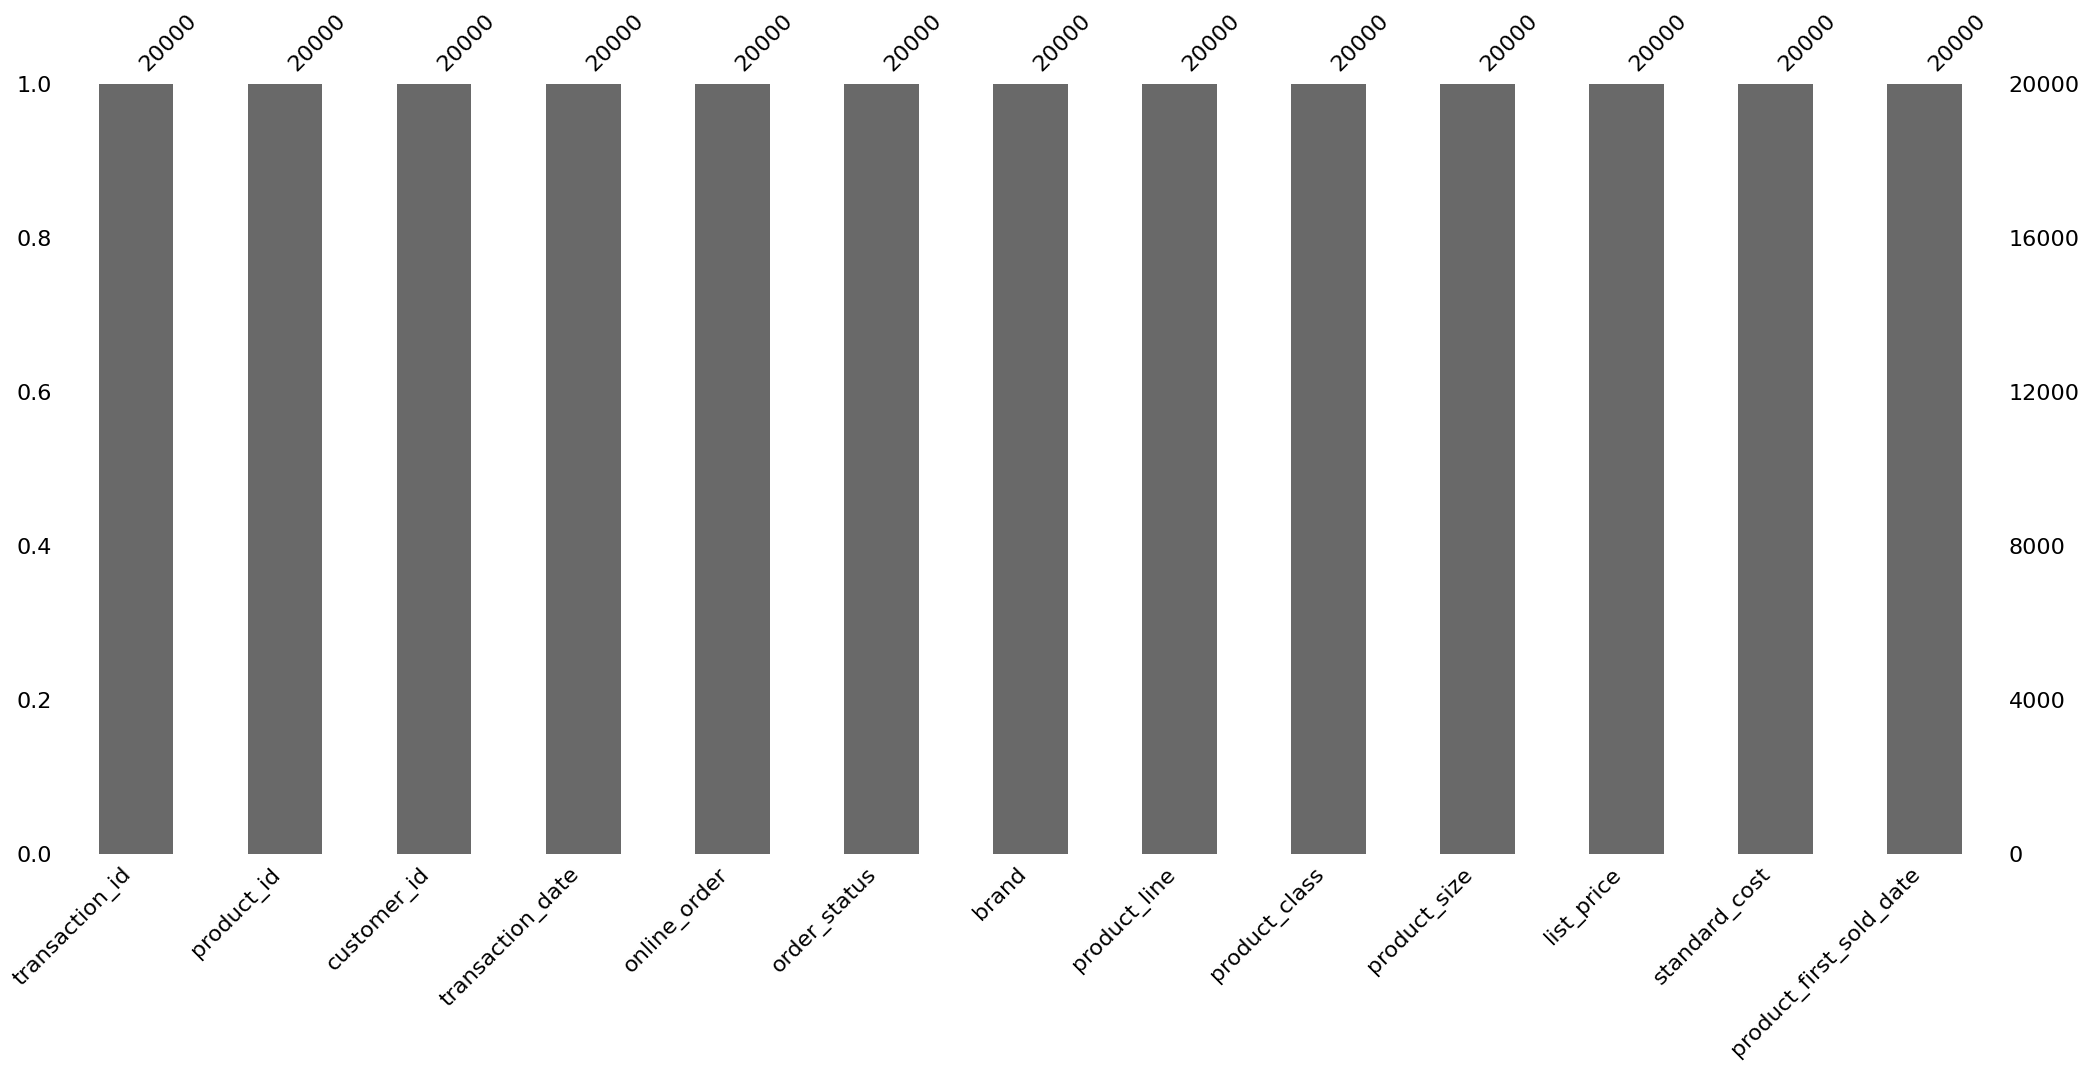

In [68]:
# Visualize missing values using Missingno's bar chart
msno.bar(transaction_df)

In [69]:
# Display DataFrame information after imputing missing values
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [70]:
# A function that will parse the date Time based cohort:  1 day of month
def get_month(x): return dt.datetime(x.year, x.month, 1) 

# Create transaction_date column based on month and store in TransactionMonth
transaction_df['TransactionMonth'] = transaction_df['transaction_date'].apply(get_month) 

# Grouping by customer_id and select the InvoiceMonth value
grouping = transaction_df.groupby('customer_id')['TransactionMonth'] 

# Assigning a minimum InvoiceMonth value to the dataset
transaction_df['CohortMonth'] = grouping.transform('min')

# printing top 5 rows
print(transaction_df.head())

   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date TransactionMonth  \
0       71.49     

In [71]:
# Define a function to extract year, month, and day as separate columns from a datetime column
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

# Getting the integers for date parts from the `InvoiceDay` column
transcation_year, transaction_month, _ = get_date_int(transaction_df, 'TransactionMonth')

# Getting the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(transaction_df, 'CohortMonth')

In [72]:
# Get the difference in years
years_diff = transcation_year - cohort_year

# Calculate difference in months
months_diff = transaction_month - cohort_month

""" Extract the difference in months from all previous values
 "+1" in addeded at the end so that first month is marked as 1 instead of 0 for easier interpretation. 
 """
# Calculate the CohortIndex
transaction_df['CohortIndex'] = years_diff * 12 + months_diff  + 1 

# Print the first 5 rows
print(transaction_df.head(5))

   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date TransactionMonth  \
0       71.49     

In [73]:
# Counting daily active user from each chort
grouping = transaction_df.groupby(['CohortMonth', 'CohortIndex'])

# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = grouping['customer_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

 # Assigning column names to the dataframe created above
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns ='CohortIndex',
                                 values = 'customer_id')

# Printing top 5 rows of Dataframe
cohort_data.head()

,CohortMonth,CohortIndex,customer_id
0,2017-01-01,1,1354
1,2017-01-01,2,486
2,2017-01-01,3,508
3,2017-01-01,4,509
4,2017-01-01,5,502


In [74]:
# Printing cohort counts rounded to one decimal place
print(cohort_counts.round(1))

CohortIndex      1      2      3      4      5      6      7      8      9   \
CohortMonth                                                                   
2017-01-01   1354.0  486.0  508.0  509.0  502.0  483.0  518.0  529.0  500.0   
2017-02-01    800.0  325.0  298.0  313.0  288.0  298.0  308.0  281.0  329.0   
2017-03-01    484.0  167.0  174.0  167.0  182.0  184.0  172.0  212.0  189.0   
2017-04-01    336.0  111.0  121.0  153.0  143.0  121.0  142.0  126.0  132.0   
2017-05-01    210.0   85.0   81.0   87.0   71.0   74.0   73.0   81.0    NaN   
2017-06-01    122.0   45.0   44.0   47.0   46.0   46.0   53.0    NaN    NaN   
2017-07-01     77.0   26.0   29.0   32.0   37.0   24.0    NaN    NaN    NaN   
2017-08-01     51.0   19.0   21.0   17.0   13.0    NaN    NaN    NaN    NaN   
2017-09-01     23.0    7.0    7.0    9.0    NaN    NaN    NaN    NaN    NaN   
2017-10-01     20.0    6.0    8.0    NaN    NaN    NaN    NaN    NaN    NaN   
2017-11-01     13.0    5.0    NaN    NaN    NaN    N

In [75]:
# Extracting cohort sizes from the first column of cohort_counts
cohort_sizes = cohort_counts.iloc[:,0]

# Calculating retention rates by dividing cohort_counts by cohort_sizes
retention = cohort_counts.divide(cohort_sizes, axis=0)

In [76]:
"""
this matrix has 2 axes: 
x - cohort date (beginning of month); y - cohort maturity (in months)
every cell is a unique count of customer for the x and y

if a customer's last order was in period 2,
they were active in period 0, 1 as well
same for other periods

"""

# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,35.9,37.5,37.6,37.1,35.7,38.3,39.1,36.9,39.2,36.7,38.1
2017-02-01,100.0,40.6,37.2,39.1,36.0,37.2,38.5,35.1,41.1,38.5,37.0,NaN
2017-03-01,100.0,34.5,36.0,34.5,37.6,38.0,35.5,43.8,39.0,37.4,NaN,NaN
2017-04-01,100.0,33.0,36.0,45.5,42.6,36.0,42.3,37.5,39.3,NaN,NaN,NaN
2017-05-01,100.0,40.5,38.6,41.4,33.8,35.2,34.8,38.6,NaN,NaN,NaN,NaN
2017-06-01,100.0,36.9,36.1,38.5,37.7,37.7,43.4,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,33.8,37.7,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,37.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# Formatting the index of the retention DataFrame
retention.index = retention.index.strftime('%Y-%m')
retention.index

Index(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
      dtype='object', name='CohortMonth')

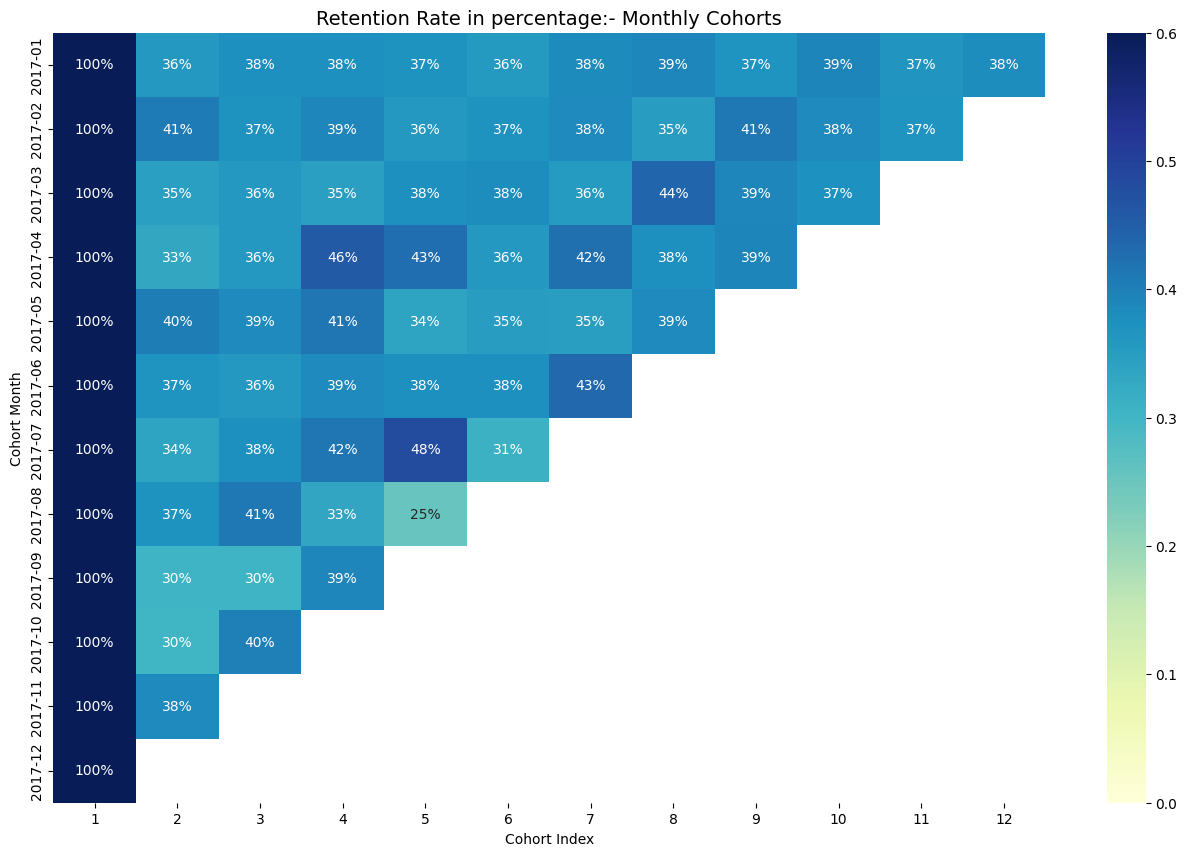

In [78]:
# Initialize the figure
plt.figure(figsize=(16, 10))

# Adding a title
plt.title('Retention Rate in percentage:- Monthly Cohorts', fontsize = 14)

# Creating the seaborn based heatmap
sns.heatmap(retention, annot=True, fmt= '.0%',cmap='YlGnBu', vmin = 0.0 , vmax = 0.6)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='vertical')
plt.show()

In [79]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = transaction_df.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the standard  average cost of the standard_cost column
cohort_data = grouping['standard_cost'].mean()

# Reset the index of cohort_data before pivot
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_order = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex',
                                  values='standard_cost')

# Rounding the 'average_order' values to one decimal place
average_standard_cost = average_order.round(1)

In [80]:
# Displaying the first few rows of the 'average_standard_cost' DataFrame
average_standard_cost.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,553.0,576.6,576.4,579.1,567.1,581.6,561.5,512.4,567.8,531.1,520.5,549.2
2017-02-01,560.3,561.7,546.3,572.5,546.0,529.1,582.8,532.9,571.5,564.0,570.8,NaN
2017-03-01,534.4,611.6,623.0,551.4,521.4,583.7,564.1,580.3,530.0,510.5,NaN,NaN
2017-04-01,524.3,620.3,560.3,552.2,512.8,517.7,562.3,508.7,557.3,NaN,NaN,NaN
2017-05-01,604.0,557.4,589.0,576.2,615.4,496.9,593.3,600.9,NaN,NaN,NaN,NaN


In [81]:
# Formatting the index of the 'average_standard_cost' DataFrame
average_standard_cost.index = average_standard_cost.index.strftime('%Y-%m')
average_standard_cost.index

Index(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
      dtype='object', name='CohortMonth')

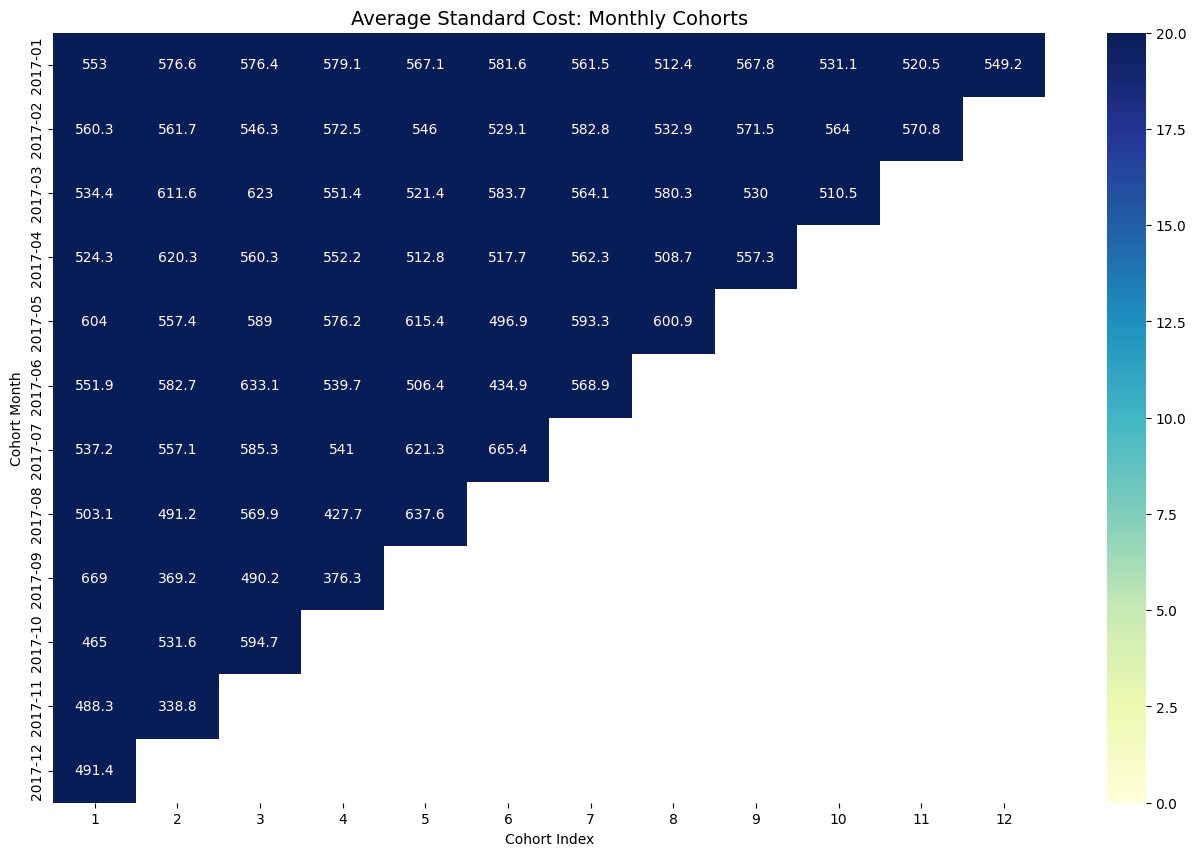

In [82]:
# Initialize the figure
plt.figure(figsize=(16, 10))

# Adding a title
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)

# Creating the heatmap
sns.heatmap(average_standard_cost, annot = True,vmin = 0.0, vmax =20,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='vertical')
plt.show()

In [83]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = transaction_df.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the list price column
cohort_data = grouping['list_price'].mean()

# Reset the index of cohort_data before pivot
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_list = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex',
                                  values='list_price')

# Rounding the 'average_list' values to one decimal place
average_list_cost = average_list.round(1)

# Displaying the first few rows of the 'average_list_cost' DataFrame
average_list_cost.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,1109.4,1141.0,1119.8,1120.3,1117.3,1125.3,1143.7,1066.8,1104.1,1101.9,1086.5,1055.9
2017-02-01,1088.1,1103.2,1115.4,1127.8,1126.7,1090.6,1150.1,1064.2,1090.6,1115.3,1098.2,NaN
2017-03-01,1071.2,1169.8,1155.1,1066.3,1046.2,1157.9,1136.9,1139.2,1123.4,1095.7,NaN,NaN
2017-04-01,1073.5,1159.5,1102.4,1081.9,1037.2,1099.2,1110.0,1085.2,1235.6,NaN,NaN,NaN
2017-05-01,1144.9,1079.4,1109.5,1144.3,1166.3,1138.8,1070.3,1220.9,NaN,NaN,NaN,NaN


In [84]:
average_list_cost.index = average_list_cost.index.strftime('%Y-%m')
average_list_cost.index

Index(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
      dtype='object', name='CohortMonth')

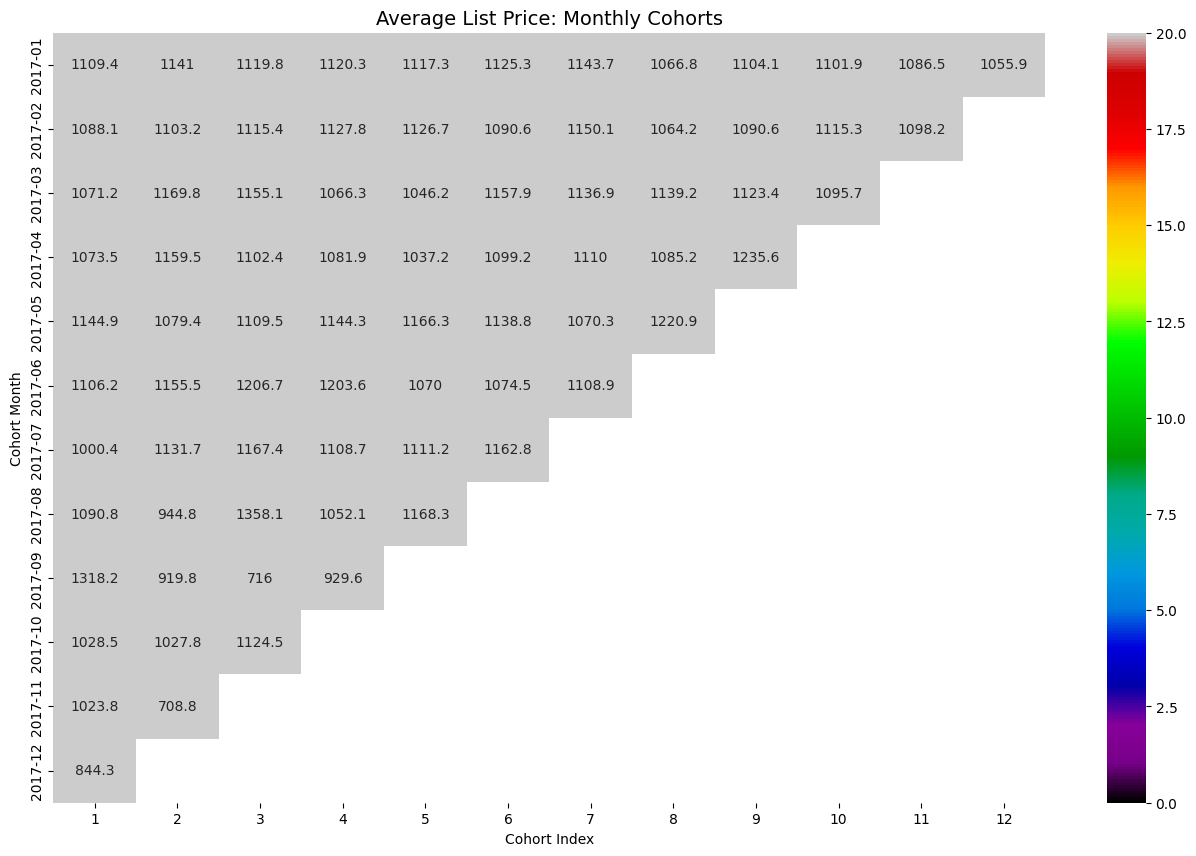

In [85]:
# Initialize the figure
plt.figure(figsize=(16, 10))

# Adding a title
plt.title('Average List Price: Monthly Cohorts', fontsize = 14)

# Creating the heatmap
sns.heatmap(average_list_cost, annot = True,vmin = 0.0, vmax =20,cmap="nipy_spectral", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='vertical')
plt.show()